In [7]:
import re
from collections import defaultdict

def calculate_averages(file_path):
    # Dictionary to store values for each category
    data = defaultdict(list)

    # Read the file and extract values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])
                data[key].append(value)

    # Calculate averages
    averages = {key: sum(values) / len(values) for key, values in data.items()}
    
    return averages

# Usage
file_path = "norm.txt"
averages = calculate_averages(file_path)

# Print results
for key, avg in averages.items():
    print(f"Average {key}: {avg:.2f}")


Average Z: 2.38
Average Zest: 10.17
Average PPL: 8.17
Average GPT: 9.21
Average CompletionLen: 553.21


In [10]:
def calculate_percentage_above_threshold(file_path, threshold=4):
    z_values = []

    # Read the file and extract Z values
    with open(file_path, 'r') as file:
        for line in file:
            elements = line.strip().split(',')
            for i in range(0, len(elements) - 1, 2):
                key = elements[i]
                value = float(elements[i + 1])

                if key == 'Z':  # Collect Z values
                    z_values.append(value)

    # Calculate percentage of values above the threshold
    total_samples = len(z_values)
    above_threshold = sum(1 for value in z_values if value > threshold)
    
    percentage = (above_threshold / total_samples) * 100 if total_samples > 0 else 0
    return percentage, total_samples, above_threshold

# Usage
file_path = "norm.txt"  # Replace with the actual path to your file
percentage, total, above_threshold = calculate_percentage_above_threshold(file_path, 4)

# Print the results
print(f"Total samples: {total}")
print(f"Samples with Z > 4: {above_threshold}")
print(f"Percentage of samples with Z > 4: {percentage:.2f}%")


Total samples: 100
Samples with Z > 4: 20
Percentage of samples with Z > 4: 20.00%


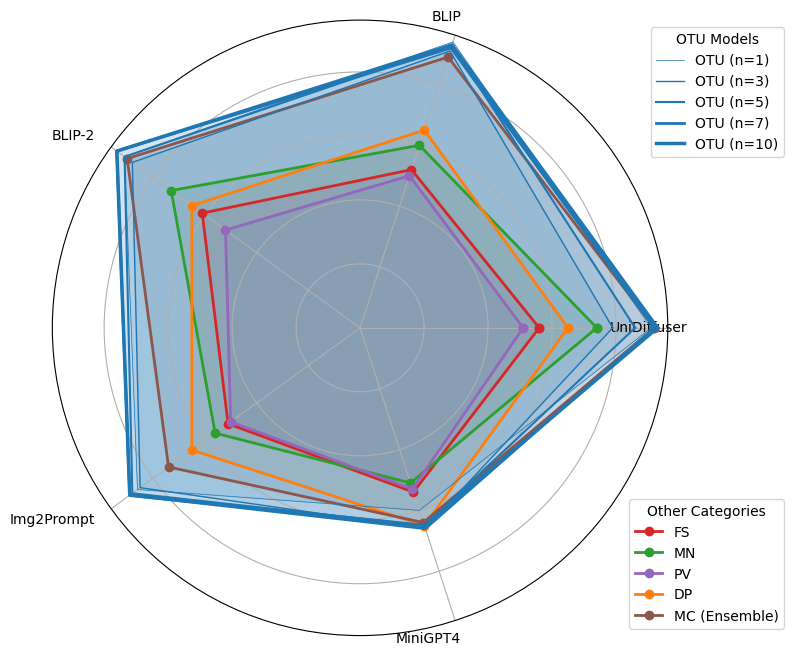

In [ ]:
# attackvlmtransfer_seed42.png
import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ["UniDiffuser", "BLIP", "BLIP-2", "Img2Prompt", "MiniGPT4"]
categories = ["FS", "MN", "PV", "DP", "MC (Ensemble)", "OTU (n=1)", "OTU (n=3)", "OTU (n=5)", "OTU (n=7)", "OTU (n=10)"]
values = np.array([
    [0.56, 0.74, 0.51, 0.65, 0.92, 0.91, 0.79, 0.86, 0.92, 0.93],
    [0.52, 0.6, 0.5, 0.65, 0.89, 0.94, 0.91, 0.93, 0.92, 0.93],
    [0.61, 0.73, 0.52, 0.65, 0.9, 0.91, 0.88, 0.91, 0.94, 0.94],
    [0.51, 0.56, 0.5, 0.65, 0.74, 0.86, 0.85, 0.88, 0.89, 0.89],
    [0.54, 0.51, 0.53, 0.65, 0.64, 0.6, 0.66, 0.65, 0.66, 0.65]
])

# Replace NaN values with zero for plotting
values = np.nan_to_num(values).T  # Transpose to swap axes

# Number of variables (now methods)
num_vars = len(methods)

# Compute angle for each method
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar shape

# Define OTU-related indices and styles
otu_indices = [5, 6, 7, 8, 9]  # Indices of OTU models
otu_color = 'tab:blue'
otu_line_weights = [0.5, 1, 1.5, 2, 2.5]  # Varying line weights for OTU models
other_colors = ['tab:red', 'tab:green', 'tab:purple', 'tab:orange', 'tab:brown']

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each category's performance across methods
otu_legend_handles = []
other_legend_handles = []

for i, category in enumerate(categories):
    data = values[i].tolist()
    data += data[:1]  # Close the radar shape
    if i in otu_indices:
        line, = ax.plot(angles, data, label=category, linewidth=otu_line_weights[otu_indices.index(i)], color=otu_color)
        ax.fill(angles, data, alpha=0.1, color=otu_color)
        otu_legend_handles.append(line)
    else:
        line, = ax.plot(angles, data, label=category, linewidth=2, marker='o', color=other_colors[i % len(other_colors)])
        ax.fill(angles, data, alpha=0.1, color=other_colors[i % len(other_colors)])
        other_legend_handles.append(line)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_yticklabels([])  # Hide y-axis labels for better readability

# Set legend
otu_legend = ax.legend(handles=otu_legend_handles, title="OTU Models", loc='upper right', bbox_to_anchor=(1.2, 1))
other_legend = ax.legend(handles=other_legend_handles, title="Other Categories", loc='lower right', bbox_to_anchor=(1.2, 0))

# Add legends to plot
ax.add_artist(otu_legend)

# Show plot
plt.tight_layout()
plt.show()


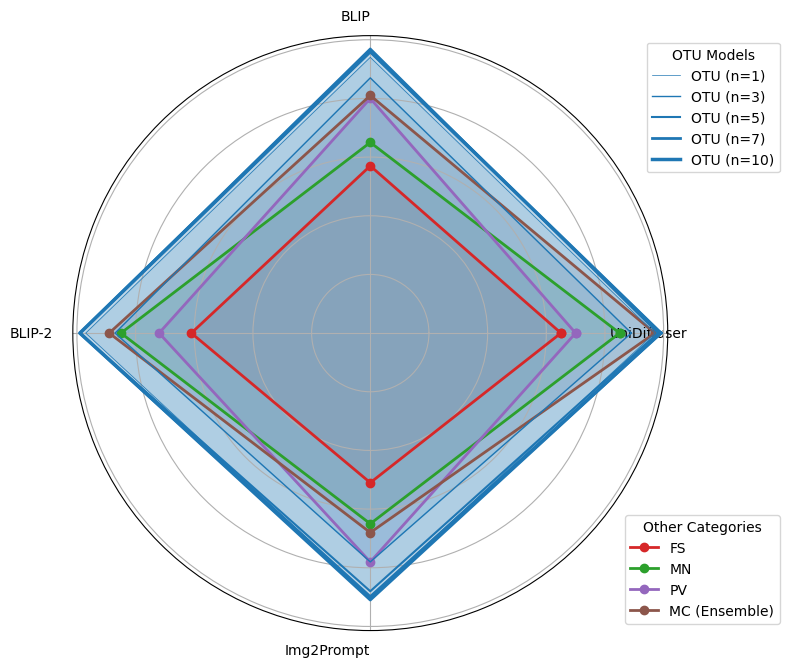

In [25]:
# attackvlmquery_seed42.png
import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ["UniDiffuser", "BLIP", "BLIP-2", "Img2Prompt"]
categories = ["FS", "MN", "PV", "MC (Ensemble)", "OTU (n=1)", "OTU (n=3)", "OTU (n=5)", "OTU (n=7)", "OTU (n=10)"]
values = np.array([
    [0.65, 0.85, 0.7, 0.97, 0.97, 0.89, 0.98, 0.99, 0.99],
    [0.57, 0.65, 0.8, 0.81, 0.94, 0.87, 0.97, 0.96, 0.96],
    [0.61, 0.85, 0.72, 0.89, 0.97, 0.87, 0.99, 0.99, 0.99],
    [0.51, 0.65, 0.78, 0.68, 0.9, 0.78, 0.88, 0.91, 0.9]
])

# Replace NaN values with zero for plotting
values = np.nan_to_num(values).T  # Transpose to swap axes

# Number of variables (now methods)
num_vars = len(methods)

# Compute angle for each method
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar shape

# Define OTU-related indices and styles
otu_indices = [4, 5, 6, 7, 8]  # Indices of OTU models
otu_color = 'tab:blue'
otu_line_weights = [0.5, 1, 1.5, 2, 2.5]  # Varying line weights for OTU models
other_colors = ['tab:red', 'tab:green', 'tab:purple', 'tab:brown']

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each category's performance across methods
otu_legend_handles = []
other_legend_handles = []

for i, category in enumerate(categories):
    data = values[i].tolist()
    data += data[:1]  # Close the radar shape
    if i in otu_indices:
        line, = ax.plot(angles, data, label=category, linewidth=otu_line_weights[otu_indices.index(i)], color=otu_color)
        ax.fill(angles, data, alpha=0.1, color=otu_color)
        otu_legend_handles.append(line)
    else:
        line, = ax.plot(angles, data, label=category, linewidth=2, marker='o', color=other_colors[i % len(other_colors)])
        ax.fill(angles, data, alpha=0.1, color=other_colors[i % len(other_colors)])
        other_legend_handles.append(line)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_yticklabels([])  # Hide y-axis labels for better readability

# Set legend
otu_legend = ax.legend(handles=otu_legend_handles, title="OTU Models", loc='upper right', bbox_to_anchor=(1.2, 1))
other_legend = ax.legend(handles=other_legend_handles, title="Other Categories", loc='lower right', bbox_to_anchor=(1.2, 0))

# Add legends to plot
ax.add_artist(otu_legend)

# Show plot
plt.tight_layout()
plt.show()


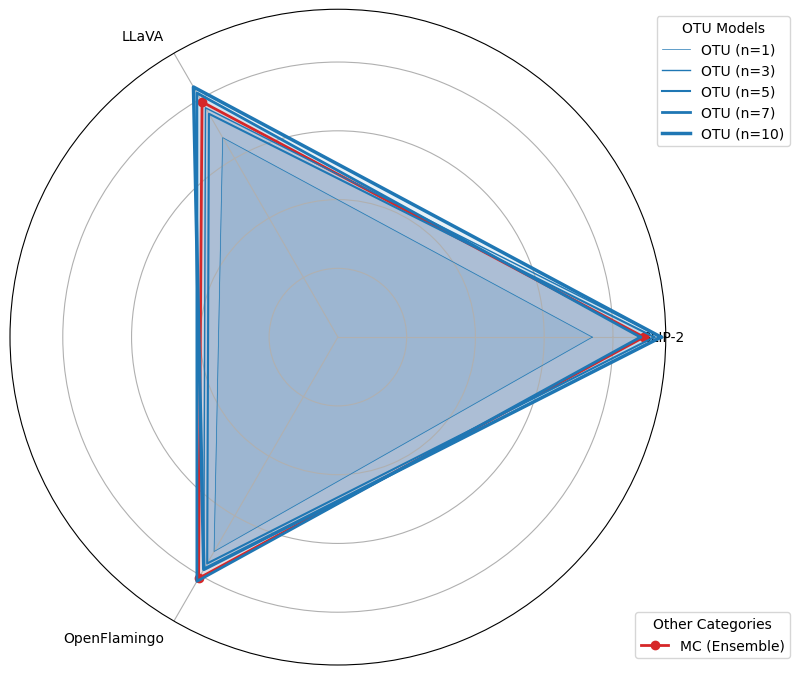

In [26]:
# MMFM and Bard

import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ["BLIP-2", "LLaVA", "OpenFlamingo"]
categories = ["MC (Ensemble)", "OTU (n=1)", "OTU (n=3)", "OTU (n=5)", "OTU (n=7)", "OTU (n=10)"]
values = np.array([
    [0.89, 0.74, 0.94, 0.92, 0.88, 0.94],
    [0.79, 0.67, 0.77, 0.75, 0.82, 0.84],
    [0.81, 0.72, 0.78, 0.76, 0.82, 0.78]
])

# Replace NaN values with zero for plotting
values = np.nan_to_num(values).T  # Transpose to swap axes

# Number of variables (now methods)
num_vars = len(methods)

# Compute angle for each method
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the radar shape

# Define OTU-related indices and styles
otu_indices = [1, 2, 3, 4, 5]  # Indices of OTU models
otu_color = 'tab:blue'
otu_line_weights = [0.5, 1, 1.5, 2, 2.5]  # Varying line weights for OTU models
other_colors = ['tab:red']

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each category's performance across methods
otu_legend_handles = []
other_legend_handles = []

for i, category in enumerate(categories):
    data = values[i].tolist()
    data += data[:1]  # Close the radar shape
    if i in otu_indices:
        line, = ax.plot(angles, data, label=category, linewidth=otu_line_weights[otu_indices.index(i)], color=otu_color)
        ax.fill(angles, data, alpha=0.1, color=otu_color)
        otu_legend_handles.append(line)
    else:
        line, = ax.plot(angles, data, label=category, linewidth=2, marker='o', color=other_colors[i % len(other_colors)])
        ax.fill(angles, data, alpha=0.1, color=other_colors[i % len(other_colors)])
        other_legend_handles.append(line)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_yticklabels([])  # Hide y-axis labels for better readability

# Set legend
otu_legend = ax.legend(handles=otu_legend_handles, title="OTU Models", loc='upper right', bbox_to_anchor=(1.2, 1))
other_legend = ax.legend(handles=other_legend_handles, title="Other Categories", loc='lower right', bbox_to_anchor=(1.2, 0))

# Add legends to plot
ax.add_artist(otu_legend)

# Show plot
plt.tight_layout()
plt.show()
